In [1]:
# level 1-1 of preprocessing

autocorrect_file = open("autocorrect.txt","r")
file_content = autocorrect_file.read()
lowerText = file_content.lower()

In [2]:
# level 1-2 of preprocessing

words = lowerText.strip().split() # Convert to a list of words without spaces at the beginning and end of the text
whiteSpace = " "
newText = whiteSpace.join(words) # Join words together with a space

In [3]:
# level 1-3 of preprocessingpp
from nltk.tokenize import word_tokenize

tokenizedText = word_tokenize(newText)

In [4]:
# level 1-4 of preprocessing
import string
import re

# This method removes punctuation of text
def removePunctuation(input_list):
    
    # Make a translation table that maps all punctuation characters to None(by their ackii code)
    translator = str.maketrans("", "", string.punctuation)
    
    # Apply the translation table to the input list
    result = []
    for i in input_list:
        result.append(i.translate(translator)) # by translate method, remove None from i
  
    return result

unpunc_text = removePunctuation(tokenizedText)


# This method removes numbers in the text
def removeNumber(input_list):

    # Recognize numbers in the input list then replaced with an empty string
    result = []
    for i in input_list:
        result.append(re.sub("[0-9]", "", i))

    return result

unpunc_text = removeNumber(unpunc_text)
pureText_list = [x for x in unpunc_text if x != '']


In [5]:
# level 1-5 of preprocessing
import nltk
from nltk.corpus import stopwords

# This method removes stop words in the text
def removeStopWords(input_list):

    stop_words = set(stopwords.words("english"))
    filtered_sentence = []

    for i in input_list:
        if i not in stop_words:
            filtered_sentence.append(i)

    return filtered_sentence

filtered_sentence = removeStopWords(pureText_list)

In [6]:
# level 1-6 of preprocessing

# This method removes words with less than 3 characters
def removeWords(input_list):
    
    result = [i for i in input_list if len(i) >= 3]
    return result
    
filtered_sentence = removeWords(filtered_sentence)

In [7]:
# level 1-7 of preprocessing
from collections import Counter

text_form = " ".join(filtered_sentence) # convert list (filtered_sentence) to string

# This method splits sentence to words
def split_sentence(sentence): 
    return list(re.split(' ', sentence.lower()))

# This method creates the vocabulary
def generate_vocabulary(text, min_threshold):
    # convert the list to one string
    concatStr = ' '.join([str(elem).strip('\n') for elem in text])
    
    # divide the individual words
    individualWords = split_sentence(concatStr)
    
    # create a list of words that happen min_threshold times or more in that string
    condition_keys = sorted([key for key, value in Counter(individualWords).items() if value >= min_threshold])
    
    # generate the vocabulary(make dictionary with each words and range of whole words )
    result = dict(zip(condition_keys, range(len(condition_keys))))
    
    return result

save_textForm = [text_form]
vocabulary = generate_vocabulary(save_textForm, min_threshold=1)

print("The length of vocabulary is :", len(vocabulary))

The length of vocabulary is : 5976


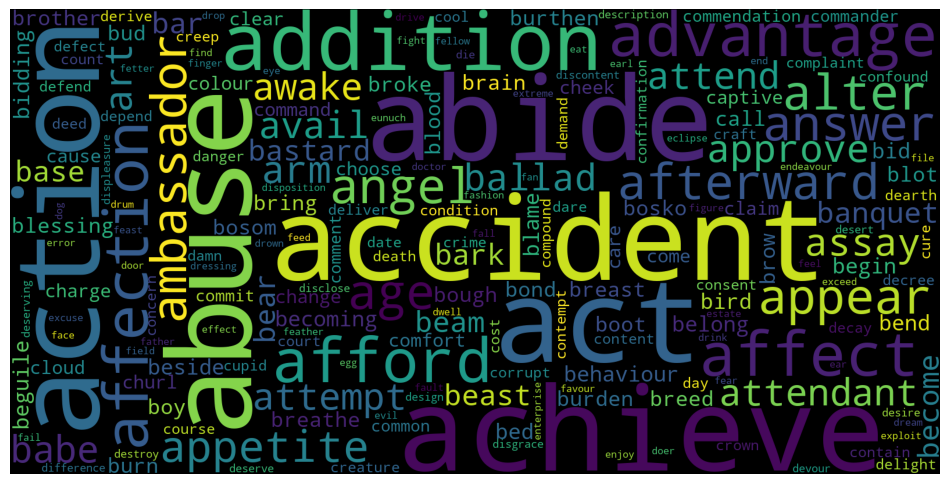

In [8]:
# level 1-8 of preprocessing
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(final_data):
    
    # call the generate method of WordCloud class to generate an image
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
    
    # plt the image generated by WordCloud class
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


words = " ".join(map(str,list(vocabulary.keys())))
words = str(words)


create_word_cloud(words)

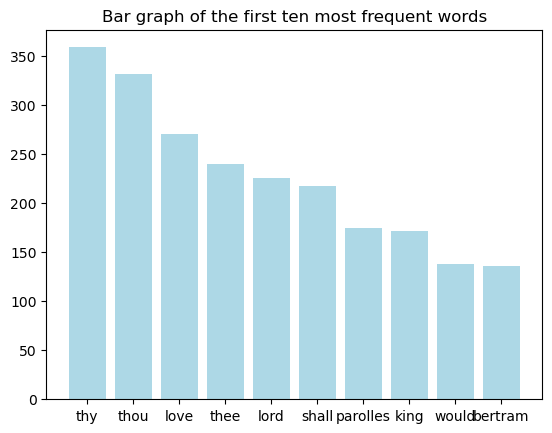

In [9]:
# level 1-9 of preprocessing
from collections import Counter
import matplotlib.pyplot as plt

split_it = text_form .split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)

freqNum = []
dataName = []

for i in most_occur:
    i = list(i)
    freqNum.append(i[1])
    dataName.append(i[0])


x_data = dataName # X value is name of most frequent words
y_data = freqNum  # Y value is the number of repetitions each words

plt.title("Bar graph of the first ten most frequent words")
plt.bar(x_data , y_data , color='lightblue')
plt.show()

In [10]:
# level 2-1 of Calculation of probabilities

def get_count(input_list):
    
    frequency = {}
    for item in input_list:
        if item in frequency: # checking the element in dictionary
            # Word repetition
            frequency[item] += 1
        else:
            # initializing the count
            frequency[item] = 1

    return frequency

wordList = filtered_sentence
wordDic = get_count(wordList)

if 'thou' in wordList:
    print("The repetition of thou is :" , wordDic['thou'])

The repetition of thou is : 332


In [11]:
# level 2-2 of Calculation of probabilities

def get_probs(input_dic):
    
    probsDic = {}
    length = len(vocabulary)
    
    for k in input_dic:
        v = input_dic[k]
        probsDic[k] = v / length
     
    return probsDic

probability =  get_probs(wordDic)   

if 'thou' in wordDic:
    print("The  probability of thou is :" , probability['thou'])

The  probability of thou is : 0.05555555555555555


In [17]:
# level 3-1 of String manipulation

def delete_char(input_word):
    
    wordList = []
    for i in range(len(input_word)):
        new_word = input_word[:i] + input_word[i+1:] # For each character we create a new word without that character
        wordList.append(new_word)
    
    return wordList

new_WordList = delete_char("cans")

print("Possible Strings :" , new_WordList)
print("Number of Strings :" , len(new_WordList))
        
    

Possible Strings : ['ans', 'cns', 'cas', 'can']
Number of Strings : 4


In [18]:
# level 3-2 of String manipulation

def switch_char(input_word): 
    
    wordList = []
    for i in range(len(input_word) - 1): # Create a new string for both adjacent characters and merge it with the other characters
        before_char = input_word[:i]
        swap_char = input_word[i + 1] + input_word[i]
        next_char = input_word[i + 2:]
        new_word = before_char + swap_char + next_char
        wordList.append(new_word)

    return wordList


new_WordList = switch_char("wrod")
print("Possible Strings :" , new_WordList)
print("Number of Strings :" , len(new_WordList))
            

Possible Strings : ['rwod', 'word', 'wrdo']
Number of Strings : 3


In [19]:
# level 3-3 of String manipulation

def replace_char(input_word):
    
    wordList = []
    for i in range(len(input_word)):
        for j in 'abcdefghijklmnopqrstuvwxyz':
            new_word = input_word[:i] + j + input_word[i+1:]
            
            if  new_word != input_word: # do not count the word itself
                wordList.append(new_word)
    
    return wordList
    
new_WordList = replace_char("can")
print("Possible Strings :" , new_WordList , "\n")
print("Number of Strings :" , len(new_WordList))    

Possible Strings : ['aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz'] 

Number of Strings : 75


In [20]:
# level 3-4 of String manipulation

def insert_char(input_word):
    wordList = []
    for i in range(len(input_word)+1):
        for j in 'abcdefghijklmnopqrstuvwxyz':   
            nList = list(input_word)
            nList.insert(i , j)
            wordList.append("".join(nList))

    return wordList

result = insert_char("at")
newlist = [] # empty list to hold unique elements from the list

for i in result: # Remove duplicates
    if i not in newlist:
        newlist.append(i)

        
print("Possible Strings :" , newlist , "\n")
print("Number of Strings :" , len(newlist))         

Possible Strings : ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz'] 

Number of Strings : 76


In [23]:
# level 4-1 of edits

def edit_one_char(input_word):
    
   
    deletes = delete_char(input_word)
    switches = switch_char(input_word)
    replaces = replace_char(input_word)
    inserts = insert_char(input_word)
    
    return  deletes + inserts + switches + replaces
    
result = edit_one_char("at")

        
print("Possible Strings :" , result , "\n")
print("Number of Strings :" , len(result))    
    
    

Possible Strings : ['t', 'a', 'aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'ta', 'bt', 'ct', 'dt', 'et', 'ft', 'gt', 'ht', 'it', 'jt', 'kt', 'lt', 'mt', 'nt', 'ot', 'pt', 'qt', 'rt', 'st', 'tt', 'ut', 'vt', 'wt', 'xt', 'yt', 'zt', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'au', 'av', 'aw', 'ax', 'ay', 'az'] 

Number of Strings : 131


In [25]:
# level 4-2 of edits

def edit_two_char(input_word):
    
    one_time_edit = edit_one_char(input_word) # Do one-char edits
    two_time_edit = []
    for i in one_time_edit:
        two_time_edit = two_time_edit + edit_one_char(i) # add all its two-char edits to two_time_edit 
    

    edits = one_time_edit + two_time_edit # Merge two lists
    return list(set(edits))


result = edit_two_char("at")

        
print("Possible Strings :" , result , "\n")
print("Number of Strings :" , len(result))    


Possible Strings : ['', 'xatg', 'aei', 'haat', 'rsat', 'jtk', 'ltv', 'ztk', 'ist', 'ya', 'jtp', 'bast', 'fadt', 'dsat', 'rjat', 'dth', 'adjt', 'last', 'cqat', 'atrz', 'mu', 'tvt', 'reat', 'aqot', 'bad', 'aph', 'tcat', 'qaj', 'acq', 'atfo', 'xvat', 'ont', 'apta', 'mx', 'jlt', 'ke', 'jaz', 'sgat', 'atw', 'natc', 'htq', 'tatr', 'atrr', 'vnat', 'amtq', 'xqat', 'matl', 'db', 'vaot', 'dht', 'vadt', 'tpt', 'atef', 'vats', 'artb', 'ztn', 'atam', 'eaw', 'zoat', 'by', 'azit', 'hagt', 'ajl', 'ks', 'hp', 'cfat', 'aitz', 'gtv', 'apq', 'eatr', 'oaf', 'aetf', 'etb', 'yw', 'apo', 'atvl', 'aoxt', 'ada', 'hax', 'past', 'wjt', 'qzt', 'ptq', 'otl', 'iaft', 'arn', 'ace', 'lx', 'jtb', 'aptr', 'aoa', 'xa', 'haj', 'auta', 'atqw', 'hit', 'dast', 'nnat', 'fet', 'rta', 'fmt', 'hatd', 'apyt', 'bit', 'uu', 'ayyt', 'acti', 'bht', 'uast', 'akf', 'cut', 'py', 'patu', 'atti', 'adtg', 'ktv', 'wad', 'ntw', 'aoi', 'amb', 'vuat', 'yk', 'dah', 'watq', 'uwat', 'cw', 'aow', 'mg', 'stx', 'tato', 'astd', 'srt', 'lc', 'gyat', '

In [38]:
# level 5 of Error correction

def get_suggestions(word, probs, vocab):
    
    suggestions = []
    
    # The input word is exactly in the vocabulary
    if word in vocab:
        return [[word],[probs[word]]]
        
    # First edit
    for i in edit_one_char(word):
        if i in vocab:
            suggestions.append(i)
            
     # Second edit        
    for j in edit_two_char(word):
        if i in vocab:
            suggestions.append(j)
            
     # Calculate words Posibilities        
    probsList = []
    for k in suggestions:
        if k in probs:
            probsList.append(probs[k])
        else:
            probsList.append(0)

    
    sorted_edits = list(zip(suggestions, probsList))
    
    return sorted_edits

word = "wrte"

res = get_suggestions(word, probability, vocabulary)

# Convert tuple to list    
for i in range(len(res)):
    res[i] = list( res[i])
    
print(res)
            

[['write', 0.0030120481927710845], ['wrote', 0.00016733601070950468]]
